# **ABOUT HEART ATTACK**

A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart attack.

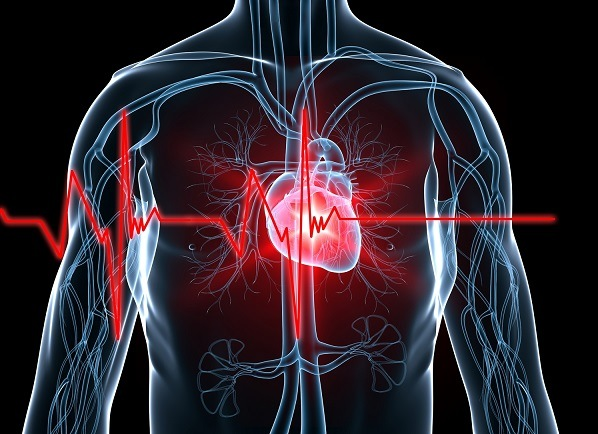

This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more. Using the information explore the dataset and classify the target variable using different Machine Learning models and findout which algorithm suitable for this dataset.

# **Importing Requires Libraries**

Let's import all neccesary libraries. The main library that used in that work is pandas. Pandas help to create and work with dataframes and datasets.

For visualization I use library matplotlib and subpackage pyplot.

For implementing Machine Learning models and processing of data, I use the sklearn library.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# **Reading And Printing First Few Rows Of The Data**

In [ ]:
url = 'https://raw.githubusercontent.com/Nishit333/Heart-attack/master/CSV%20File/heart.csv?token=AMRLV26K2TWB67EBG72F66K7NMB2M'
heart_data = pd.read_csv(url)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



# **Dataset Columns Feature Explain**

1. Age (In years)
 
2. Sex
    1 - Male
    0 - Female

3. CP (Chest Pain Type) 
    0 - Typical Angina (Heart related)
    1 - Atypical Angina (Non-heart related)
    2 - Non-Anginal pain (Non-heart related)
    3 - Asymptomatic (No disease)

4. TRESTBPS (Resting Blood Pressure (in mm Hg on admission to the hospital)) 

5. CHOL (Serum Cholestoral in mg/dl)
     Healthy serum cholesterol is less than 200 mg/dL

6. FPS (Fasting blood sugar > 120 mg/dl)
     1 - True
     0 - False

7. RESTECH (Resting Electro Cardio Graphic results)
 
8. THALACH (Maximum heart rate achieved)
 
9. EXANG (Exercise induced Angina)
     1 - Yes
     0 - No

10. OLDPEAK (ST depression induced by exercise relative to rest)
 
11. SLOPE (Slope of the peak exercise ST segment)
 
12. CA (Number of major vessels (0-3) colored by Flouroscopy)
 
13. THAL
     0 - Normal
     1 - Fixed defect
     2 - Reversible defect
 
14. TARGET
     1 - Heart Problem
     0 - No Heart Problem 

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **Renaming The Columns For Better Understanding**

In [ ]:
heart_data.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']

In [ ]:
heart_data.describe()

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Missing Values**

In [ ]:
heart_data.isnull().any()

Age                      False
Gender                   False
ChestPain                False
RestingBloodPressure     False
Cholestrol               False
FastingBloodSugar        False
RestingECG               False
MaxHeartRateAchivied     False
ExerciseIndusedAngina    False
Oldpeak                  False
Slope                    False
MajorVessels             False
Thalassemia              False
Target                   False
dtype: bool

# **Unique Values In Each Column**

In [ ]:
heart_data.nunique()

Age                       41
Gender                     2
ChestPain                  4
RestingBloodPressure      49
Cholestrol               152
FastingBloodSugar          2
RestingECG                 3
MaxHeartRateAchivied      91
ExerciseIndusedAngina      2
Oldpeak                   40
Slope                      3
MajorVessels               5
Thalassemia                4
Target                     2
dtype: int64

# **Check For Null Values**

In [ ]:
heart_data.isnull().sum().any()

False

# **Correlation Plot of All the Data**

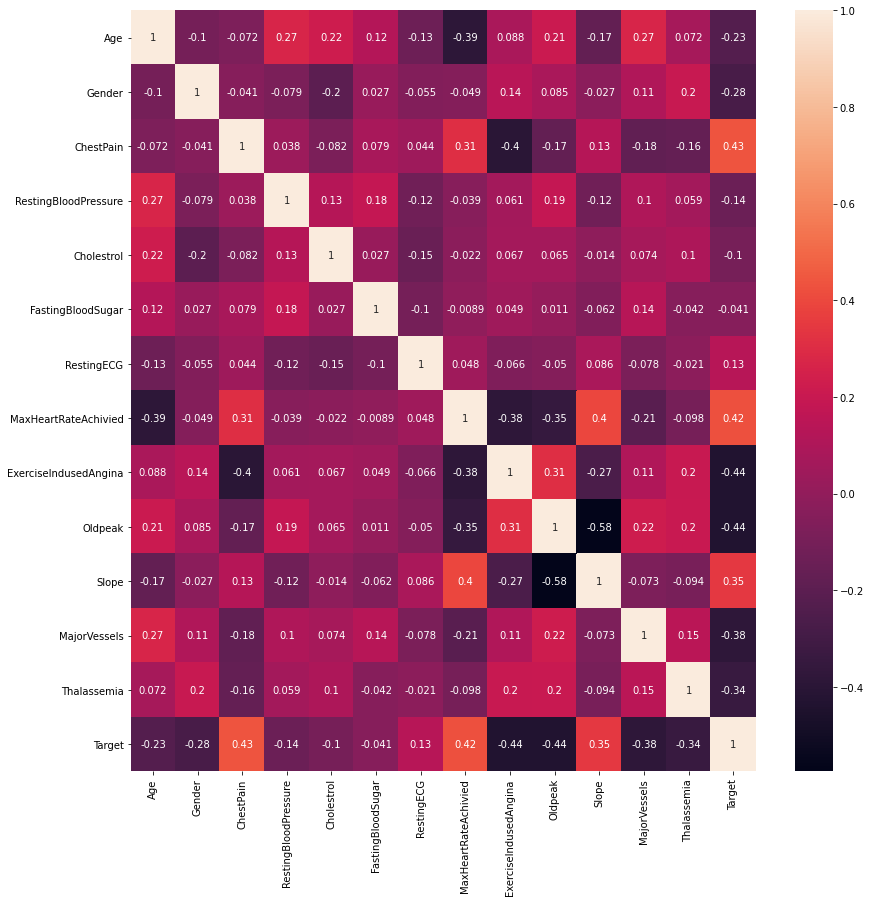

In [ ]:
plt.figure(figsize=(14, 14))
sns.heatmap(heart_data.corr(),annot=True)
plt.show()

From this correlation matrix, we can understand that all data is unique and not strongly correlated with each other.

It’s also worth noting that some attributes are highly correlated with the target - ChestPain, MaxHeartRateAchivied, slope


# **Target Balanced Plot**

let's look on target balanced plot. An extremely imbalanced dataset can render the whole model training useless and thus, will be of no use

In [ ]:
heart_data.Target.value_counts()

1    526
0    499
Name: Target, dtype: int64

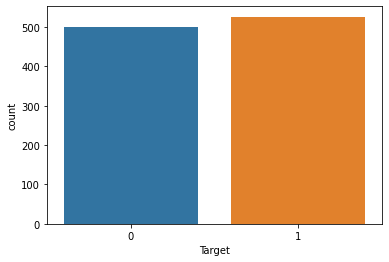

In [ ]:

sns.countplot(x="Target", data=heart_data)
plt.show()

# **Statistics**

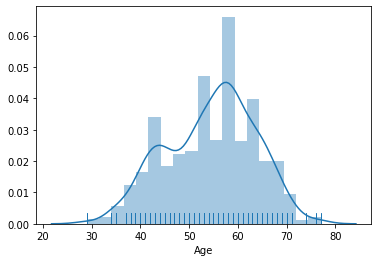

In [ ]:
sns.distplot(heart_data['Age'],rug=True)
plt.show()

# **Gender Distribution In Data**

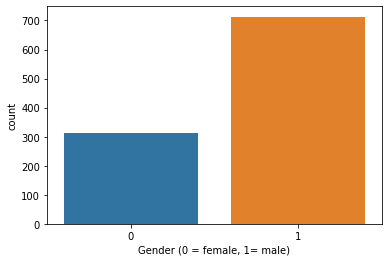

In [ ]:
sns.countplot(x='Gender', data=heart_data)
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

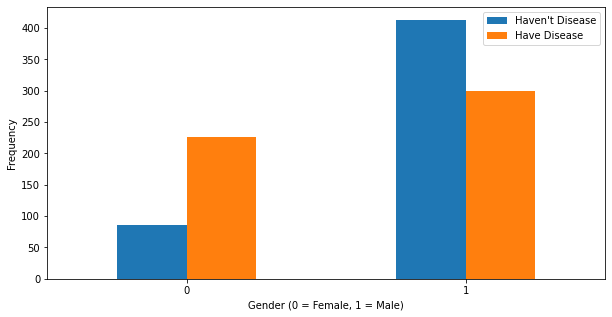

In [ ]:
pd.crosstab(heart_data.Gender,heart_data.Target).plot(kind="bar",figsize=(10,5))
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# **Different Types of Chest Pain**

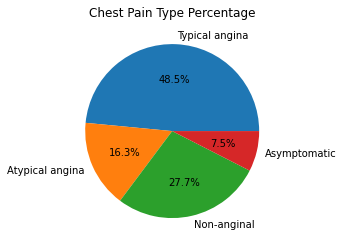

In [ ]:
typical_angina_cp = [k for k in heart_data['ChestPain'] if k ==0]
atypical_angina_cp = [k for k in heart_data['ChestPain'] if k ==1]
non_anginal_cp = [k for k in heart_data['ChestPain'] if k ==2]
none_cp = [k for k in heart_data['ChestPain'] if k ==3]

typical_angina_cp_total = len(typical_angina_cp)*100/len(heart_data)
atypical_angina_cp_total = len(atypical_angina_cp)*100/len(heart_data)
non_anginal_cp_total = len(non_anginal_cp)*100/len(heart_data)
none_cp_total = len(none_cp)*100/len(heart_data)

labels=['Typical angina','Atypical angina','Non-anginal','Asymptomatic']
values = [typical_angina_cp_total,atypical_angina_cp_total,non_anginal_cp_total,none_cp_total]

plt.pie(values,labels=labels,autopct='%1.1f%%')

plt.title("Chest Pain Type Percentage")    
plt.show()

# **Chest Pain Types In Different Gender**

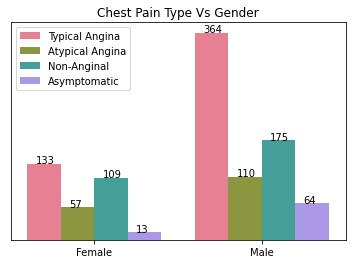

In [ ]:
result=[]
for k in heart_data['ChestPain']:
    if k == 0:
        result.append('Typical Angina')
    elif k == 1:
        result.append('Atypical Angina')
    elif k == 2:
        result.append('Non-Anginal')
    elif k == 3:
        result.append('Asymptomatic')

heart_data['Chest Pain Type'] = result

ax = sns.countplot(hue=result,x='Gender',data=heart_data,palette='husl')

plt.title("Chest Pain Type Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+1))

ax.set_xticklabels(['Female','Male']);

# **Chest Pain Across Different Age Groups**

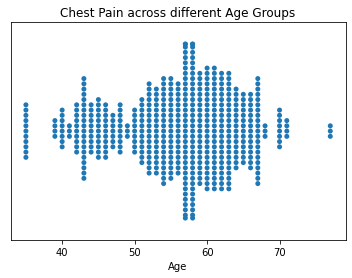

In [ ]:
age = []
for i in range(len(heart_data)):    
    if heart_data['ChestPain'][i] == 0:        
        age.append(heart_data['Age'][i])    

sns.swarmplot(age)
plt.title("Chest Pain across different Age Groups")    
plt.xlabel("Age")
plt.ylabel("")
plt.yticks([]);

# **Healthy Heart Or Heart Disease**

In [ ]:
heart_health=[]
for k in heart_data['Target']:
    if k == 0:
        heart_health.append('Healthy Heart')
    elif k == 1:
        heart_health.append('Heart Disease')

# **Heart Attacks In Male and Female**

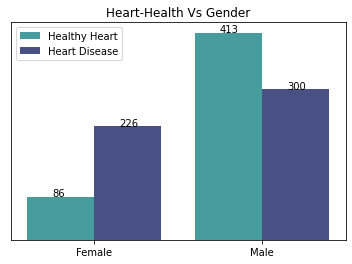

In [ ]:
ax = sns.countplot(x='Gender',hue=heart_health,data=heart_data,palette='mako_r')

plt.title("Heart-Health Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
ax.set_xticklabels(['Female','Male']);

# **Percentage Of Heart Problem In Male and Female**

In [ ]:
f = ((heart_data['Gender'] == 0) & (heart_data['Target'] == 1)).sum()
fd =  (heart_data['Target'] == 1).sum()
print('Percent of Female having heart disease : {:.2f}%'.format(f/fd * 100))

m = ((heart_data['Gender'] == 1) & (heart_data['Target'] == 1)).sum()
md =  (heart_data['Target'] == 1).sum()
print('Percent of Male having heart disease : {:.2f}%'.format(m/md * 100))

Percent of Female having heart disease : 42.97%
Percent of Male having heart disease : 57.03%


# **Heart-Health Vs Chest Pain Type**

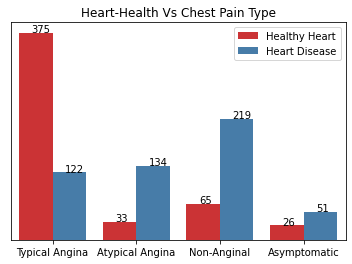

In [ ]:
plt.title("Heart-Health Vs Chest Pain Type")
    
ax = sns.countplot(x='Chest Pain Type',hue=heart_health,data=heart_data,palette='Set1')

plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+0.5))

# **Heart-Health Vs Age Group**

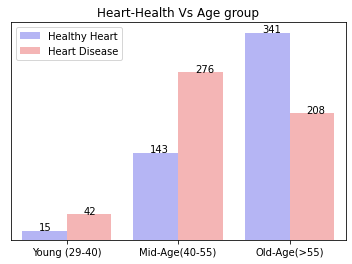

In [ ]:
age_group=[]
for k in heart_data['Age']:
    if (k >=29) & (k<40):
        age_group.append(0)
    elif (k >=40)&(k<55):
        age_group.append(1)
    else:
        age_group.append(2)
heart_data['Age-Group'] = age_group
plt.title("Heart-Health Vs Age group")
ax = sns.countplot(x=age_group,hue=heart_health,palette='bwr')

plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+0.5))
    
ax.set_xticklabels(['Young (29-40)','Mid-Age(40-55)','Old-Age(>55)']);

# **Percent Of Different Age Group Having Heart Disease**

In [ ]:
y = ((heart_data['Age-Group'] == 0) & (heart_data['Target'] == 1)).sum()
yd =  (heart_data['Target'] == 1).sum()
print('Percent of Youth having heart disease   : {:.2f}%'.format(y/yd * 100))

m = ((heart_data['Age-Group'] == 1) & (heart_data['Target'] == 1)).sum()
md =  (heart_data['Target'] == 1).sum()
print('Percent of Mid-Age having heart disease : {:.2f}%'.format(m/md * 100))

o = ((heart_data['Age-Group'] == 2) & (heart_data['Target'] == 1)).sum()
od =  (heart_data['Target'] == 1).sum()
print('Percent of Old-Age having heart disease : {:.2f}%'.format(o/od * 100))


Percent of Youth having heart disease   : 7.98%
Percent of Mid-Age having heart disease : 52.47%
Percent of Old-Age having heart disease : 39.54%


# **Fasting Blood Sugar**

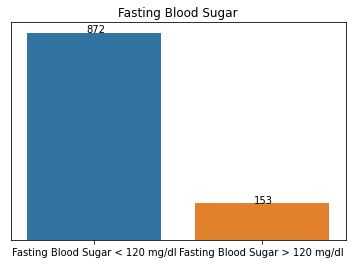

In [ ]:
ax = sns.countplot(x='FastingBloodSugar',data=heart_data)
plt.title("Fasting Blood Sugar")
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.5))
ax.set_xticklabels(["Fasting Blood Sugar < 120 mg/dl","Fasting Blood Sugar > 120 mg/dl"]);

# **Serum Cholestrol**

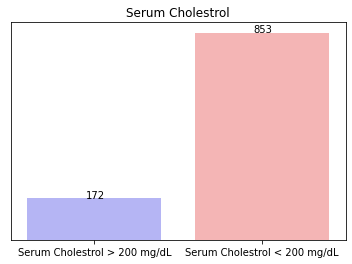

In [ ]:
serum_chol=[]
for k in heart_data['Cholestrol']:
    if k > 200:
        serum_chol.append(1) #not healthy
    else:
        serum_chol.append(0) #healthy

ax = sns.countplot(x=serum_chol,palette='bwr')

plt.title("Serum Cholestrol")
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.5))
ax.set_xticklabels(["Serum Cholestrol > 200 mg/dL","Serum Cholestrol < 200 mg/dL"]);

# **Resting Blood Pressure**

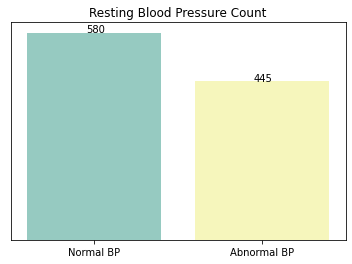

In [ ]:
bp=[]
for k in heart_data['RestingBloodPressure']:
    if (k > 130):
        bp.append(1) #high bp
    else:
        bp.append(0) #normal

ax = sns.countplot(x=bp,palette='Set3')

plt.title("Resting Blood Pressure Count")
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.5))
    
ax.set_xticklabels(["Normal BP","Abnormal BP"]);

# **People With High Risk Of A Heart Disease**

In [ ]:
(heart_data[
     (heart_data['Age'] > 40) & 
     (heart_data['ChestPain'] == 0) &
     (heart_data['Cholestrol'] >=250) &
     (heart_data['RestingBloodPressure'] > 120) &
     (heart_data['Thalassemia']==2) &
     (heart_data['RestingECG']==1) &
     (heart_data['ExerciseIndusedAngina']==0) &
    (heart_data['MaxHeartRateAchivied']>100)]
    )

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target,Chest Pain Type,Age-Group
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Typical Angina,2
234,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1,Typical Angina,1
377,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1,Typical Angina,2
622,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Typical Angina,2
647,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1,Typical Angina,2
761,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1,Typical Angina,1
782,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1,Typical Angina,2
788,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Typical Angina,2
956,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1,Typical Angina,1


# **Train Model**

##**Prediction**

In [103]:
X_data = heart_data.drop(columns=['Chest Pain Type','Age-Group','Target'], axis=1)
Y = heart_data['Target']

In [104]:
#normalize the data
Y = ((Y - np.min(Y))/ (np.max(Y) - np.min(Y))).values
X = ((X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data))).values

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

## **Logistic Regression**

In [106]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
print("Training accuracy: {:.2f}%".format(lr.score(x_train, y_train)*100))

Training accuracy: 86.10%


In [165]:
lr_pred = lr.predict(x_test)

lr_accuracy = accuracy_score(y_test, lr_pred)*100
print('Logistic Regression Accuracy: {:.2f}%'.format(lr_accuracy))

Logistic Regression Accuracy: 80.49%


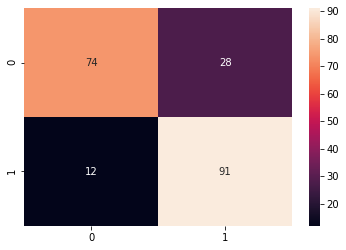

In [122]:
cm = confusion_matrix(y_test,lr_pred)
sns.heatmap(cm,annot=True);

## **Decision Tree Classifier**

This classifier creates a decision tree based on which, it assigns the class values to each data point.

In [126]:
dt_scores = []
for i in range(1, len(X_data.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 42)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append([dt_classifier.score(x_test, y_test), i])

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

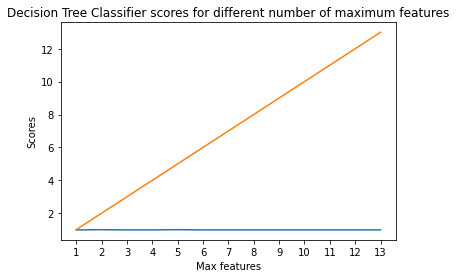

In [127]:
x_ax = [i for i in range(1, len(X_data.columns) + 1)]
plt.plot(x_ax, dt_scores)

    
plt.xticks([i for i in range(1, len(X_data.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')

plt.title('Decision Tree Classifier scores for different number of maximum features')

In [130]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [136]:
print("Training accuracy: {:.2f}".format(dt.score(x_train, y_train)*100))

Training accuracy: 100.00


In [166]:
dt_pred = dt.predict(x_test)

dt_accuracy = accuracy_score(y_test, dt_pred)*100
print('Decision Tree Classifier Accuracy: {:.2f}%'.format(dt_accuracy))

Decision Tree Classifier Accuracy: 98.54%


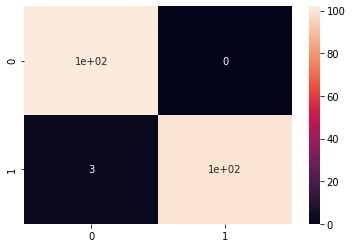

In [150]:
cm = confusion_matrix(y_test,dt_pred)
sns.heatmap(cm,annot=True);

## **Support Vector Machine**

In [146]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [148]:
print("Training accuracy: {:.2f}%".format(svm.score(x_train, y_train)*100))

Training accuracy: 91.46%


In [167]:
svm_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)*100

print('SVM Accuracy: {:.2f}%'.format(svm_accuracy))

SVM Accuracy: 86.83%


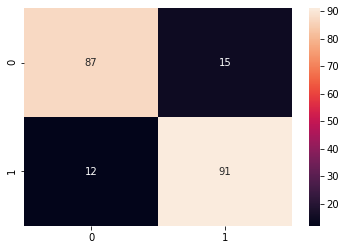

In [149]:
cm = confusion_matrix(y_test,svm_pred)
sns.heatmap(cm,annot=True);

# **Model Evaluation**

In [171]:
models = ['Logistic Regression','Decision Tree Classifier','Support Vector Machine']
accuracy = [lr_accuracy,dt_accuracy,svm_accuracy]

In [173]:
model_ev = pd.DataFrame({'Model': models, 'Accuracy': accuracy})
model_ev

,Model,Accuracy
0,Logistic Regression,80.487805
1,Decision Tree Classifier,98.536585
2,Support Vector Machine,86.829268


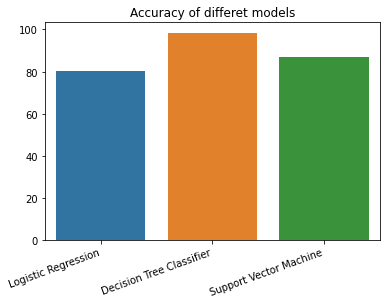

In [174]:
ax = sns.barplot(models,accuracy)

plt.title("Accuracy of differet models")

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=20,
    horizontalalignment='right');